In [1]:
pip install gensim


  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.18.5 from https://files.pythonhosted.org/packages/1a/2e/151484f49fd03944c4a3ad9c418ed193cfd02724e138ac8a9505d056c582/numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
  Obtaining dependency information for scipy>=1.7.0 from https://files.pythonhosted.org/packages/0d/3e/d05b9de83677195886fb79844fcca19609a538db63b1790fa373155bc3cf/scipy-1.10.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 kB 250.8 kB/s eta 0:0

In [ ]:
#Part 2

In [6]:
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)


100%|██████████████████████████████████████| 25.7M/25.7M [00:05<00:00, 5.16MB/s]

Extracting files...


Path to dataset files: /Users/syonaa/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [7]:
import pandas as pd
import os

data_path = os.path.join(path, "IMDB Dataset.csv") 
df = pd.read_csv(data_path)

df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Exploratory Data Analysis

In [8]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df['sentiment'].value_counts()


Shape: (50000, 2)
Columns: Index(['review', 'sentiment'], dtype='object')


positive    25000
negative    25000
Name: sentiment, dtype: int64

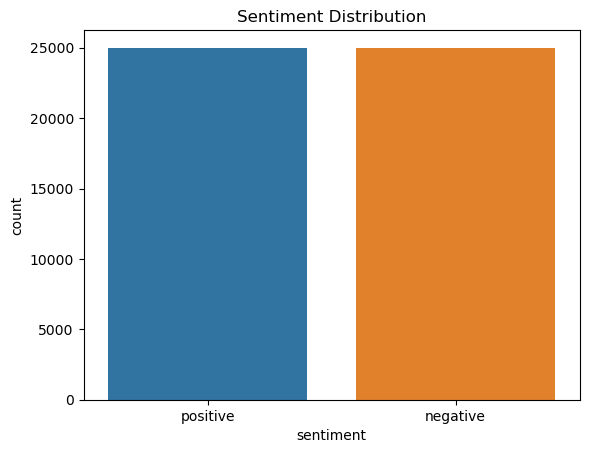

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/syonaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


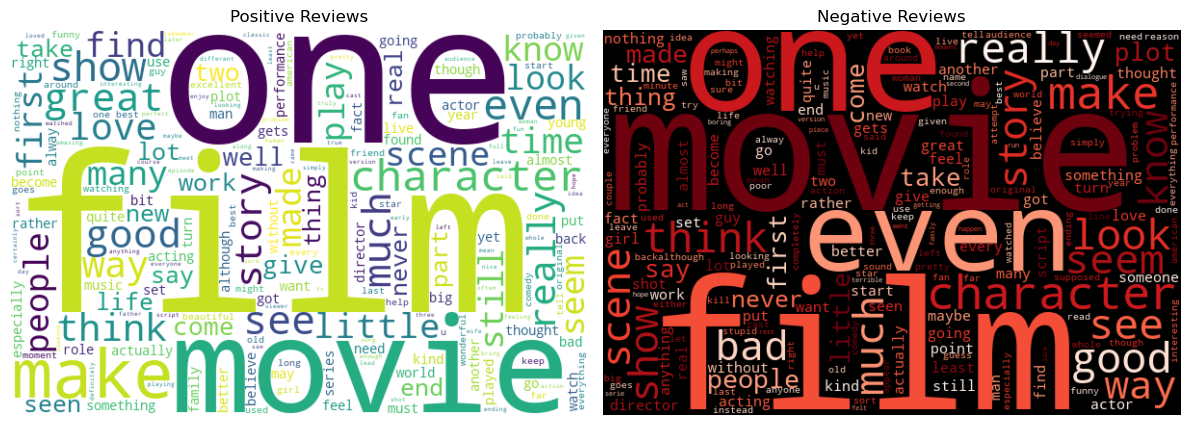

In [10]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(clean_text)

positive_text = ' '.join(df[df['sentiment'] == 'positive']['clean_review'])
negative_text = ' '.join(df[df['sentiment'] == 'negative']['clean_review'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wc_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
wc_neg = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.tight_layout()
plt.show()


In [11]:
from collections import Counter

def get_top_n_words(texts, n=10):
    all_words = ' '.join(texts).split()
    return Counter(all_words).most_common(n)

top_pos = get_top_n_words(df[df['sentiment'] == 'positive']['clean_review'], 10)
top_neg = get_top_n_words(df[df['sentiment'] == 'negative']['clean_review'], 10)

print("Top Positive Words:", top_pos)
print("Top Negative Words:", top_neg)


Top Positive Words: [('film', 29367), ('movie', 26681), ('one', 23268), ('like', 16331), ('good', 11814), ('great', 11139), ('see', 11027), ('really', 10332), ('would', 10285), ('also', 9683)]
Top Negative Words: [('movie', 34811), ('film', 25719), ('one', 21715), ('like', 20950), ('even', 14596), ('would', 13522), ('good', 11653), ('really', 11473), ('bad', 10613), ('see', 9874)]


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(corpus, ngram_range=(2, 2), n=10):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

top_bigrams_pos = get_ngrams(df[df['sentiment'] == 'positive']['clean_review'], ngram_range=(2,2))
top_bigrams_neg = get_ngrams(df[df['sentiment'] == 'negative']['clean_review'], ngram_range=(2,2))

top_trigrams_pos = get_ngrams(df[df['sentiment'] == 'positive']['clean_review'], ngram_range=(3,3))
top_trigrams_neg = get_ngrams(df[df['sentiment'] == 'negative']['clean_review'], ngram_range=(3,3))

print("Top Positive Bigrams:", top_bigrams_pos)
print("Top Negative Bigrams:", top_bigrams_neg)
print("Top Positive Trigrams:", top_trigrams_pos)
print("Top Negative Trigrams:", top_trigrams_neg)


Top Positive Bigrams: [('new york', 586), ('special effects', 525), ('saw movie', 495), ('highly recommend', 476), ('movie really', 430), ('pretty good', 411), ('really good', 411), ('looks like', 410), ('high school', 402), ('good movie', 399)]
Top Negative Bigrams: [('looks like', 1229), ('look like', 930), ('special effects', 919), ('waste time', 775), ('worst movie', 697), ('low budget', 669), ('movie like', 610), ('movie really', 524), ('bad movie', 512), ('year old', 504)]
Top Positive Trigrams: [('new york city', 115), ('world war ii', 85), ('based true story', 67), ('highly recommend movie', 50), ('story takes place', 47), ('international film festival', 46), ('seen movie times', 40), ('highly recommend film', 40), ('movie takes place', 37), ('film takes place', 37)]
Top Negative Trigrams: [('worst movie seen', 156), ('bad bad bad', 131), ('worst film seen', 80), ('waste time money', 78), ('waste time watching', 68), ('worst movies seen', 67), ('good thing movie', 64), ('makes 

In [13]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

df['cleaned'] = df['review'].apply(clean_text)


[nltk_data] Downloading package punkt to /Users/syonaa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/syonaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from gensim.models import KeyedVectors

from gensim import downloader as api
w2v_model = api.load('glove-wiki-gigaword-100')  

def get_w2v_vector(tokens, model, vector_size=100):
    vectors = [model[word] for word in tokens if word in model]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

import numpy as np
X_pretrained = np.vstack(df['cleaned'].apply(lambda x: get_w2v_vector(x, w2v_model)))
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


[==================================================] 100.0% 128.1/128.1MB downloaded


In [15]:
from gensim.models import Word2Vec

def train_custom_word2vec(sentences, sg_mode):
    return Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, sg=sg_mode, epochs=10)

w2v_cbow = train_custom_word2vec(df['cleaned'], sg_mode=0)
w2v_sg = train_custom_word2vec(df['cleaned'], sg_mode=1)

X_cbow = np.vstack(df['cleaned'].apply(lambda x: get_w2v_vector(x, w2v_cbow.wv)))
X_sg = np.vstack(df['cleaned'].apply(lambda x: get_w2v_vector(x, w2v_sg.wv)))


In [16]:
from gensim.models import FastText

fasttext_model = FastText(sentences=df['cleaned'], vector_size=100, window=5, min_count=2, workers=4, epochs=10)
X_fasttext = np.vstack(df['cleaned'].apply(lambda x: get_w2v_vector(x, fasttext_model.wv)))


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def evaluate(X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {'Model': model_name, 'Accuracy': acc, 'F1-Score': f1}

results = []
results.append(evaluate(X_pretrained, y, 'Pretrained W2V'))
results.append(evaluate(X_cbow, y, 'Custom CBOW'))
results.append(evaluate(X_sg, y, 'Custom Skip-gram'))
results.append(evaluate(X_fasttext, y, 'FastText'))

pd.DataFrame(results)


,Model,Accuracy,F1-Score
0,Pretrained W2V,0.7989,0.799960
1,Custom CBOW,0.8683,0.870565
2,Custom Skip-gram,0.8786,0.879826
3,FastText,0.8569,0.859029
